In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [7]:
os.getcwd()
#os.chdir()

'/home/bhargav/Data Science/8.Machine Learnig'

In [56]:
df=pd.read_csv("/home/bhargav/Downloads/CustomerData.csv")
df.corr()

CustomerID      City  NoOfChildren  MinAgeOfChild  \
CustomerID               1.000000 -0.464581      0.053282      -0.016692   
City                    -0.464581  1.000000     -0.065350       0.009865   
NoOfChildren             0.053282 -0.065350      1.000000      -0.179176   
MinAgeOfChild           -0.016692  0.009865     -0.179176       1.000000   
MaxAgeOfChild           -0.003227 -0.032211      0.189002       0.367127   
Tenure                  -0.022263  0.052236      0.085341      -0.055820   
FrquncyOfPurchase        0.064694 -0.099499      0.137630      -0.017568   
NoOfUnitsPurchased       0.046429 -0.066396      0.137040      -0.006191   
FrequencyOFPlay         -0.013333  0.048818      0.165036       0.006690   
NoOfGamesPlayed          0.011404  0.016010      0.213342       0.000104   
NoOfGamesBought          0.030974 -0.034055      0.131398      -0.007748   
TotalRevenueGenerated    0.041756 -0.071110      0.107365       0.024724   

                       MaxAgeOfChild    Tenure  FrquncyOfPurchase  \
CustomerID                 -0.003227 -0.022263           0.064694   
City                       -0.032211  0.052236          -0.099499   
NoOfChildren                0.189002  0.085341           0.137630   
MinAgeOfChild               0.367127 -0.055820          -0.017568   
MaxAgeOfChild               1.000000 -0.040329          -0.006213   
Tenure                     -0.040329  1.000000           0.193344   
FrquncyOfPurchase          -0.006213  0.193344           1.000000   
NoOfUnitsPurchased         -0.003926  0.192413           0.934131   
FrequencyOFPlay             0.012095  0.241809           0.279957   
NoOfGamesPlayed             0.027947  0.273696           0.397567   
NoOfGamesBought            -0.007062  0.188285           0.947787   
TotalRevenueGenerated       0.005891  0.116437           0.663328   

                       NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  \
CustomerID                       0.046429        -0.013333         0.011404   
City                            -0.066396         0.048818         0.016010   
NoOfChildren                     0.137040         0.165036         0.213342   
MinAgeOfChild                   -0.006191         0.006690         0.000104   
MaxAgeOfChild                   -0.003926         0.012095         0.027947   
Tenure                           0.192413         0.241809         0.273696   
FrquncyOfPurchase                0.934131         0.279957         0.397567   
NoOfUnitsPurchased               1.000000         0.311982         0.436149   
FrequencyOFPlay                  0.311982         1.000000         0.740204   
NoOfGamesPlayed                  0.436149         0.740204         1.000000   
NoOfGamesBought                  0.868374         0.286943         0.399178   
TotalRevenueGenerated            0.750379         0.233540         0.293995   

                       NoOfGamesBought  TotalRevenueGenerated  
CustomerID                    0.030974               0.041756  
City                         -0.034055              -0.071110  
NoOfChildren                  0.131398               0.107365  
MinAgeOfChild                -0.007748               0.024724  
MaxAgeOfChild                -0.007062               0.005891  
Tenure                        0.188285               0.116437  
FrquncyOfPurchase             0.947787               0.663328  
NoOfUnitsPurchased            0.868374               0.750379  
FrequencyOFPlay               0.286943               0.233540  
NoOfGamesPlayed               0.399178               0.293995  
NoOfGamesBought               1.000000               0.495759  
TotalRevenueGenerated         0.495759               1.000000

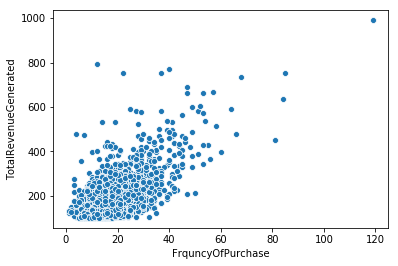

In [57]:
sns.scatterplot(x=df["FrquncyOfPurchase"],y=df["TotalRevenueGenerated"])

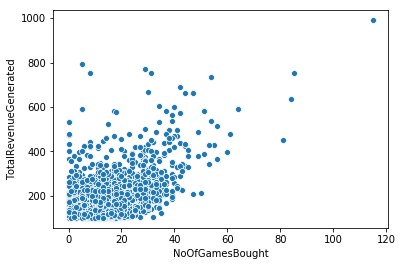

In [54]:
sns.scatterplot(x=df["NoOfGamesBought"],y=df["TotalRevenueGenerated"])

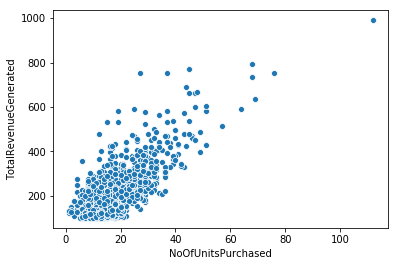

In [59]:
sns.scatterplot(x=df["NoOfUnitsPurchased"],y=df["TotalRevenueGenerated"])

In [36]:
t1=[]
t2=[]
for x in df["FavoriteChannelOfTransaction"]:
    if x=="Uniform":
        t1.append(0)
    else:
        t1.append(1)
for x in df["FavoriteGame"]:
    if x=="Uniform":
        t2.append(0)
    else:
        t2.append(1)
df.drop(columns=["FavoriteGame","FavoriteChannelOfTransaction","CustomerID"],axis=1,inplace=True)

In [37]:
df["FavoriteChannelOfTransaction"]=t1
df["FavoriteGame"]=t2

In [38]:
df.corr()

City  NoOfChildren  MinAgeOfChild  \
City                          1.000000     -0.065350       0.009865   
NoOfChildren                 -0.065350      1.000000      -0.179176   
MinAgeOfChild                 0.009865     -0.179176       1.000000   
MaxAgeOfChild                -0.032211      0.189002       0.367127   
Tenure                        0.052236      0.085341      -0.055820   
FrquncyOfPurchase            -0.099499      0.137630      -0.017568   
NoOfUnitsPurchased           -0.066396      0.137040      -0.006191   
FrequencyOFPlay               0.048818      0.165036       0.006690   
NoOfGamesPlayed               0.016010      0.213342       0.000104   
NoOfGamesBought              -0.034055      0.131398      -0.007748   
TotalRevenueGenerated        -0.071110      0.107365       0.024724   
FavoriteChannelOfTransaction  0.115878     -0.044500       0.028402   
FavoriteGame                 -0.011967     -0.056085       0.021148   

                              MaxAgeOfChild    Tenure  FrquncyOfPurchase  \
City                              -0.032211  0.052236          -0.099499   
NoOfChildren                       0.189002  0.085341           0.137630   
MinAgeOfChild                      0.367127 -0.055820          -0.017568   
MaxAgeOfChild                      1.000000 -0.040329          -0.006213   
Tenure                            -0.040329  1.000000           0.193344   
FrquncyOfPurchase                 -0.006213  0.193344           1.000000   
NoOfUnitsPurchased                -0.003926  0.192413           0.934131   
FrequencyOFPlay                    0.012095  0.241809           0.279957   
NoOfGamesPlayed                    0.027947  0.273696           0.397567   
NoOfGamesBought                   -0.007062  0.188285           0.947787   
TotalRevenueGenerated              0.005891  0.116437           0.663328   
FavoriteChannelOfTransaction       0.005438  0.001967          -0.086129   
FavoriteGame                       0.004600 -0.085138          -0.116140   

                              NoOfUnitsPurchased  FrequencyOFPlay  \
City                                   -0.066396         0.048818   
NoOfChildren                            0.137040         0.165036   
MinAgeOfChild                          -0.006191         0.006690   
MaxAgeOfChild                          -0.003926         0.012095   
Tenure                                  0.192413         0.241809   
FrquncyOfPurchase                       0.934131         0.279957   
NoOfUnitsPurchased                      1.000000         0.311982   
FrequencyOFPlay                         0.311982         1.000000   
NoOfGamesPlayed                         0.436149         0.740204   
NoOfGamesBought                         0.868374         0.286943   
TotalRevenueGenerated                   0.750379         0.233540   
FavoriteChannelOfTransaction            0.006039        -0.000887   
FavoriteGame                           -0.113322        -0.138669   

                              NoOfGamesPlayed  NoOfGamesBought  \
City                                 0.016010        -0.034055   
NoOfChildren                         0.213342         0.131398   
MinAgeOfChild                        0.000104        -0.007748   
MaxAgeOfChild                        0.027947        -0.007062   
Tenure                               0.273696         0.188285   
FrquncyOfPurchase                    0.397567         0.947787   
NoOfUnitsPurchased                   0.436149         0.868374   
FrequencyOFPlay                      0.740204         0.286943   
NoOfGamesPlayed                      1.000000         0.399178   
NoOfGamesBought                      0.399178         1.000000   
TotalRevenueGenerated                0.293995         0.495759   
FavoriteChannelOfTransaction        -0.018641        -0.071130   
FavoriteGame                        -0.164413        -0.136982   

                              TotalRevenueGenerated  \
City                       

In [39]:
x=df.drop(columns="TotalRevenueGenerated")
y=df["TotalRevenueGenerated"]


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [46]:
lm=LinearRegression()
lm.fit(x_train,y_train)
print("r2 of train",lm.score(x_train,y_train))
print("r2 of test",lm.score(x_test,y_test))

r2 of train 0.7193440197743718
r2 of test 0.7154470546452831


In [8]:
pred_test=lm.predict(x_test)
mean_squared_error(pred_test,y_test)

NameError: name 'lm' is not defined